# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
## Part III: Black Litterman Mean Risk Optimization

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'NBL', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'DHR',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  24 of 24 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.1854%,0.9483%,-1.1953%,...,0.4562%,0.4478%,1.5881%,0.0212%,2.8236%,0.9758%,1.7539%,0.2410%,1.3735%,-1.0857%
2016-01-06,-11.4863%,0.2412%,-1.7556%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-1.1649%,-3.5867%,-0.9551%,...,-1.8165%,-5.8247%,0.5547%,0.0212%,0.1592%,-1.5646%,-1.0155%,-3.0048%,-0.9034%,-2.9145%
2016-01-07,-5.1389%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8855%,-2.5666%,-4.6059%,-2.5394%,...,-3.4783%,-2.5245%,-2.2066%,-3.0309%,-1.0410%,-3.1557%,-0.2700%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2737%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5707%,-1.6402%,0.0565%,-1.7642%,-0.1649%,...,0.3067%,-0.1942%,-0.1538%,-1.1366%,-0.7308%,-0.1448%,-3.3839%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3384%,-1.6851%,-1.0215%,0.0914%,-1.1791%,0.5674%,0.5287%,-0.0565%,0.6616%,0.0330%,...,-0.0573%,-5.9682%,1.6435%,0.0000%,0.9869%,-0.1450%,1.4570%,-0.4607%,0.5800%,-1.9918%


## 2. Estimating Black Litterman Portfolios

### 2.1 Calculating a reference portfolio.

In [3]:
import riskfolio.Portfolio as pf

# Building the portfolio object
port = pf.Portfolio(returns=Y)

# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
weights,0.0000%,8.8123%,0.0000%,0.0000%,8.9083%,0.0000%,4.3663%,11.8441%,0.0000%,0.0000%,...,15.5039%,0.0000%,9.6324%,0.0000%,0.0000%,0.0000%,7.0719%,0.0000%,3.3381%,0.0000%


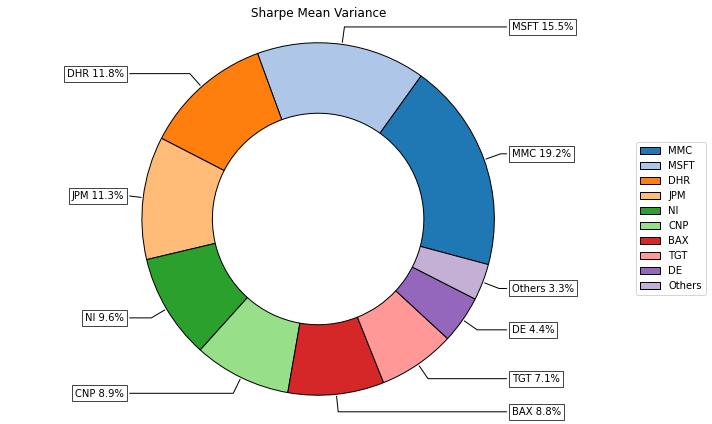

In [4]:
import riskfolio.PlotFunctions as plf

# Plotting the composition of the portfolio

ax = plf.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

### 2.2 Plotting portfolio composition

In [5]:
import riskfolio.ConstraintsFunctions as cf

asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','NBL','APA','MMC',
                            'JPM','ZION','PSA','BAX','BMY','LUV','PCAR',
                            'TXT','DHR','DE','MSFT','HPQ','SEE','VZ','CNP','NI'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Industrials','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities'] }

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

views = {'Disabled': [False, False, False],
         'Type': ['Classes', 'Classes', 'Classes'],
         'Set': ['Industry', 'Industry', 'Industry'],
         'Position': ['Energy', 'Consumer Staples', 'Materials'],
         'Sign': ['>=', '>=', '>='],
         'Weight': [0.08, 0.1, 0.09], # Anual terms 
         'Type Relative': ['Classes', 'Classes', 'Classes'],
         'Relative Set': ['Industry', 'Industry', 'Industry'],
         'Relative': ['Financials', 'Utilities', 'Industrials']}

views = pd.DataFrame(views)

display(views)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative
0,False,Classes,Industry,Energy,>=,8.0000%,Classes,Industry,Financials
1,False,Classes,Industry,Consumer Staples,>=,10.0000%,Classes,Industry,Utilities
2,False,Classes,Industry,Materials,>=,9.0000%,Classes,Industry,Industrials


In [6]:
P, Q = cf.assets_views(views, asset_classes)

display(pd.DataFrame(P.T))
display(pd.DataFrame(Q))

,0,1,2
0,50.0000%,0.0000%,0.0000%
1,0.0000%,0.0000%,0.0000%
2,0.0000%,0.0000%,0.0000%
3,0.0000%,0.0000%,0.0000%
4,0.0000%,-50.0000%,0.0000%
5,0.0000%,50.0000%,0.0000%
6,0.0000%,0.0000%,-20.0000%
7,0.0000%,0.0000%,-20.0000%
8,0.0000%,0.0000%,0.0000%
9,0.0000%,0.0000%,0.0000%


,0
0,8.0000%
1,10.0000%
2,9.0000%


In [7]:
# Estimate Black Litterman inputs:

port.blacklitterman_stats(P, Q/252, rf=rf, w=w, delta=None, eq=True)

# Estimate optimal portfolio:

model='BL'# Black Litterman
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios

w_bl = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w_bl.T)

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
weights,0.1767%,8.5049%,0.0000%,0.0000%,3.0176%,5.5676%,1.3233%,9.6337%,0.0000%,0.0000%,...,14.7530%,0.3202%,3.9612%,0.0000%,0.0000%,9.3563%,6.7604%,0.0000%,3.5561%,0.0000%


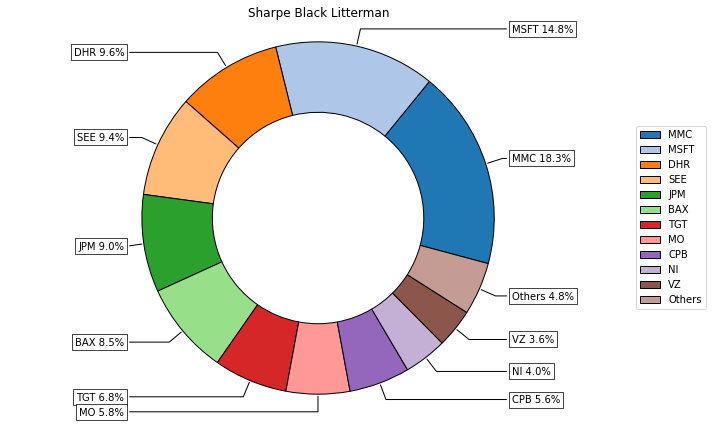

In [8]:
# Plotting the composition of the portfolio

ax = plf.plot_pie(w=w_bl, title='Sharpe Black Litterman', others=0.05, nrow=25,
                  cmap = "tab20", height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [9]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
0,0.0000%,4.8223%,4.5302%,3.1429%,7.2038%,3.3684%,0.3860%,0.7820%,0.0000%,3.0970%,...,0.0000%,0.0840%,11.4441%,0.0000%,14.6892%,0.1805%,4.1226%,0.0000%,11.6401%,0.3065%
1,0.0001%,7.1216%,2.5123%,1.9049%,5.4120%,4.3631%,1.0541%,4.9321%,0.0001%,1.4989%,...,4.7146%,0.3503%,8.2510%,0.0001%,8.0235%,4.5031%,5.4504%,0.0001%,7.9106%,0.0002%
2,0.0000%,7.6573%,1.6570%,1.1614%,4.6445%,4.8214%,1.2020%,6.5524%,0.0000%,0.7784%,...,8.2442%,0.3885%,6.8420%,0.0000%,5.1949%,6.2472%,5.9417%,0.0000%,6.4291%,0.0000%
3,0.0001%,8.0529%,0.9774%,0.4880%,4.0145%,5.1698%,1.2870%,7.8552%,0.0000%,0.1473%,...,11.0244%,0.4181%,5.6858%,0.0000%,2.8619%,7.5885%,6.3124%,0.0000%,5.2559%,0.0001%
4,0.0978%,8.3652%,0.3531%,0.0035%,3.4262%,5.4522%,1.3118%,8.9987%,0.0004%,0.0005%,...,13.4284%,0.3610%,4.6651%,0.0002%,0.8011%,8.7409%,6.6183%,0.0002%,4.2290%,0.0005%


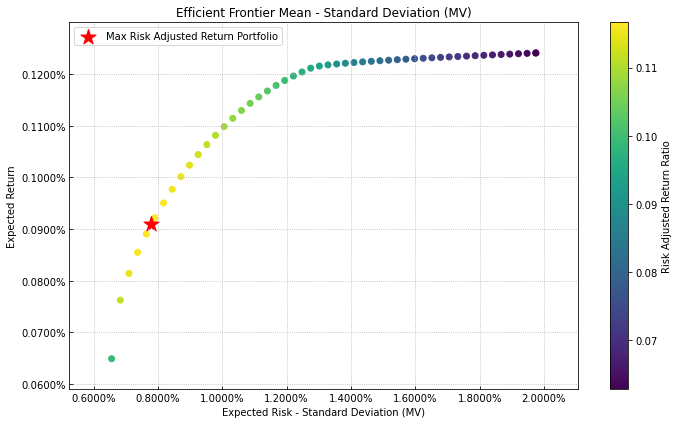

In [10]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_bl # Expected returns of Black Litterman model
cov = port.cov_bl # Covariance matrix of Black Litterman model
returns = port.returns # Returns of the assets

ax = plf.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                       rf=rf, alpha=0.01, cmap='viridis', w=w_bl, label=label,
                       marker='*', s=16, c='r', height=6, width=10, ax=None)

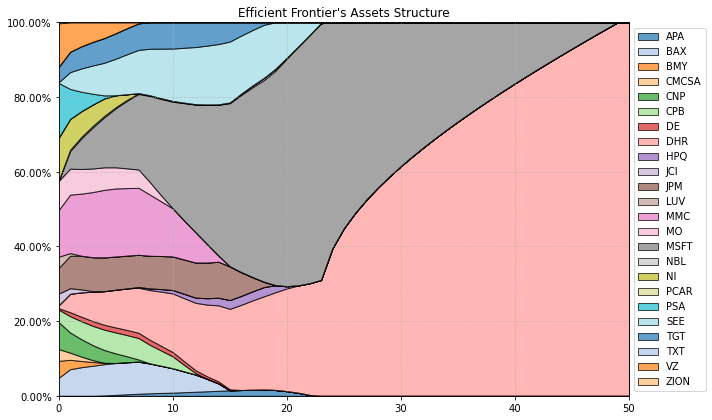

In [11]:
# Plotting efficient frontier composition

ax = plf.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Black Litterman Mean Risk Portfolios

When we use risk measures differents than Standard Deviation, Riskfolio-Lib only considers the vector of expected returns, and use historical returns to calculate risk measures.

### 3.4 Calculate Black Litterman Portfolios for Several Risk Measures

In [12]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
       'CVaR', 'WR', 'MDD', 'ADD', 'CDaR']

w_s = pd.DataFrame([])

for i in rms:
    if i == 'MV':
        hist = False
    else:
        hist = True
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [13]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,WR,MDD,ADD,CDaR
APA,0.18%,0.18%,0.63%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BAX,8.50%,1.74%,7.63%,1.42%,0.00%,0.00%,0.00%,0.00%,1.89%,0.00%
BMY,0.00%,2.62%,1.23%,0.00%,0.00%,0.00%,0.00%,7.91%,0.00%,0.00%
CMCSA,0.00%,2.25%,0.78%,0.59%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,3.02%,0.00%,2.46%,3.08%,2.73%,3.50%,0.00%,30.83%,13.29%,24.76%
CPB,5.57%,5.67%,4.41%,1.71%,6.68%,8.03%,20.85%,0.00%,0.00%,3.59%
DE,1.32%,0.00%,3.23%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DHR,9.63%,25.12%,6.24%,37.14%,46.74%,59.11%,6.60%,61.26%,20.40%,47.20%
HPQ,0.00%,0.00%,3.73%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<AxesSubplot:>

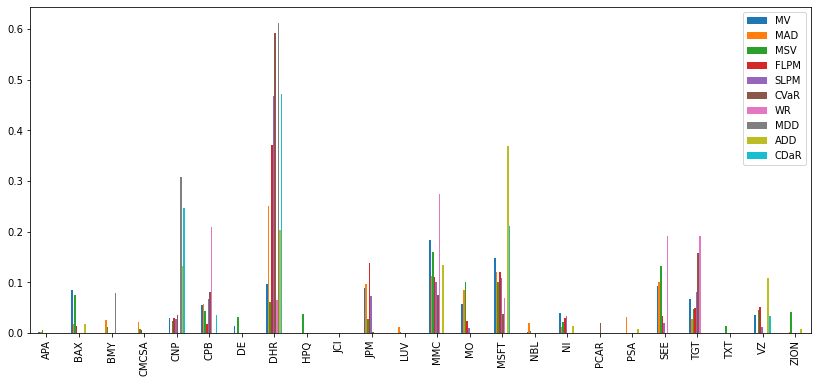

In [14]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)